In [81]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib_inline as mi
import matplotlib.pylab as plt
import matplotlib.style
from sklearn.linear_model import LinearRegression 

## LinearRegression

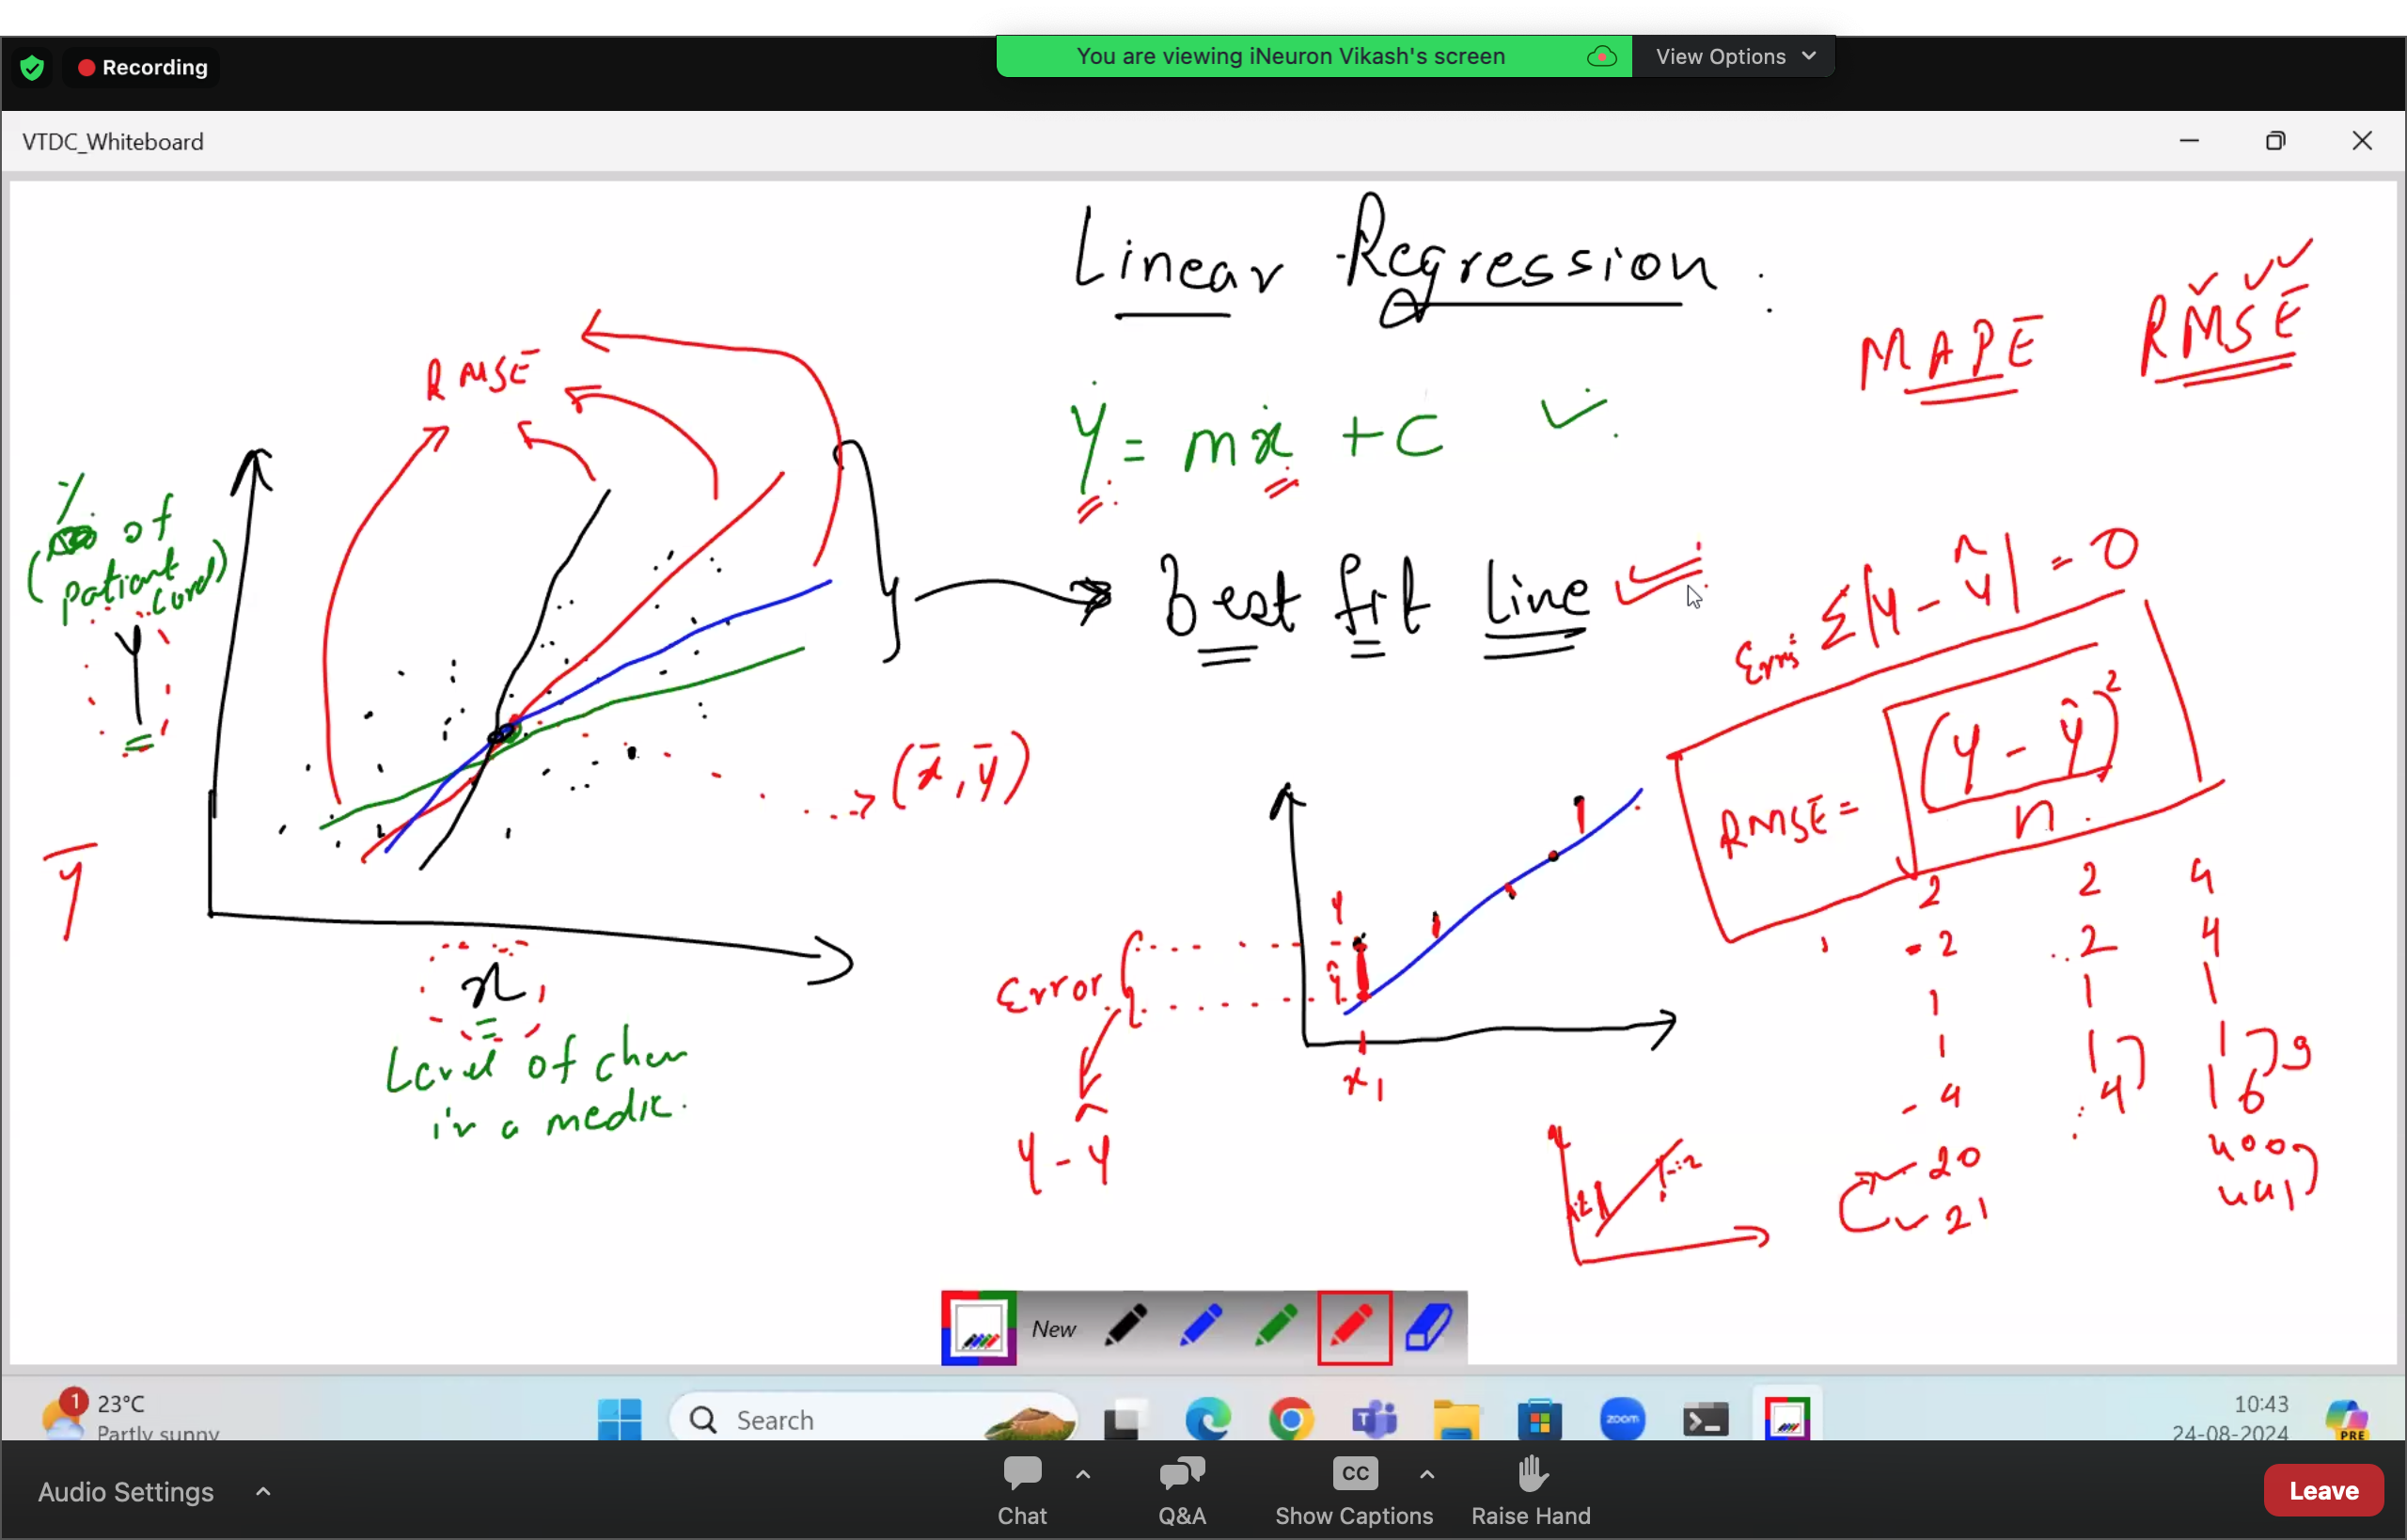

Imp Interview Question: when we square for Error (Y=Y^)^2 -> because its punishing the error
Best fit line is the one with Least RMSE

In [2]:
df = pd.read_csv("AirBNB.csv")

/var/folders/k0/r9q8frbj00n77npfmkp_j3xm0000gn/T/ipykernel_1262/1651561404.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AirBNB.csv")


In [3]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
df.shape

(74111, 11)

In [5]:
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [6]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [7]:
df['cleaning_fee'].unique()

array([True, False, nan], dtype=object)

In [8]:
df['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [10]:
## Step 1: drop the ID column
df.drop('id',axis=1,inplace=True)

In [11]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [12]:
#Seperate Numerical and catogorical value
cat = []
num = []
for i in df.columns:
    if df[i].dtype != 'object':
        num.append(i)
    else:
        cat.append(i)

In [13]:
cat

['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']

In [14]:
num

['accommodates',
 'bathrooms',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'log_price']

In [15]:
Data_Summary = round(df[num].describe().T,2)

In [16]:
Data_Summary['CoV'] = Data_Summary['std']* 100/Data_Summary['mean'] #CoV - How much data is varrying [Ration of SD to mean]
#Why do we need Cov - As quantity meay be in multiple scale-

#Income SD = 8600 , SD for Age = 11.2 -> we can't tell which spread is more
#

In [17]:
Data_Summary

,count,mean,std,min,25%,50%,75%,max,CoV
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0,68.037975
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0,46.774194
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0,8.334219
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0,66.929134
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0,73.099415
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6,15.062762


In [18]:
Data_Summary['Med-to-mean'] = round(Data_Summary['50%']/Data_Summary['mean'],2)

In [19]:
Data_Summary

,count,mean,std,min,25%,50%,75%,max,CoV,Med-to-mean
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0,68.037975,0.63
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0,46.774194,0.81
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0,8.334219,1.02
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0,66.929134,0.79
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0,73.099415,0.58
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6,15.062762,0.99


In [20]:
num

['accommodates',
 'bathrooms',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'log_price']

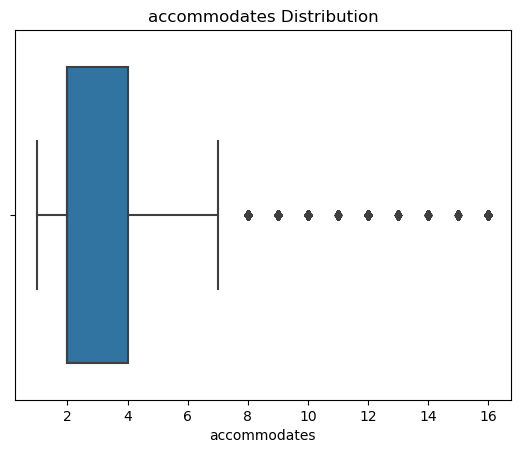

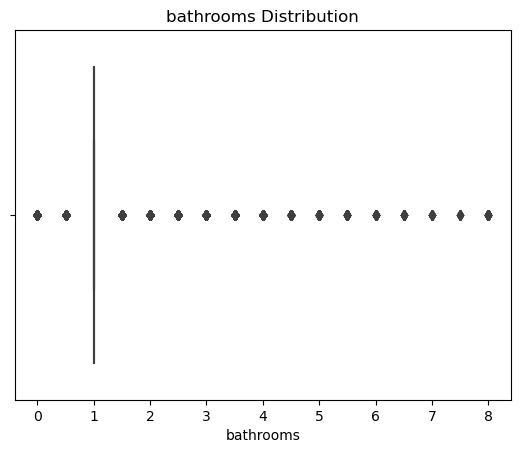

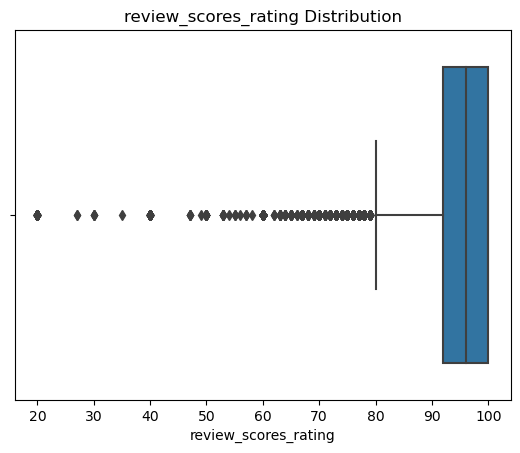

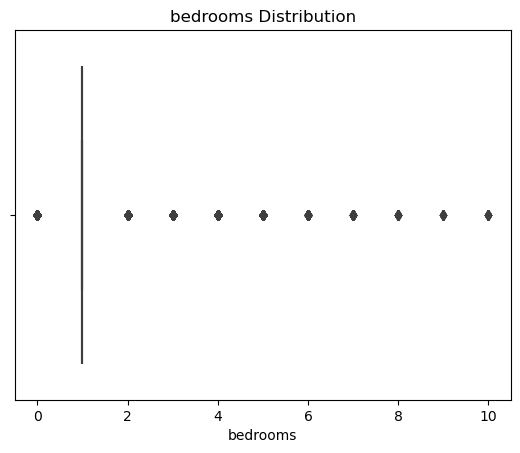

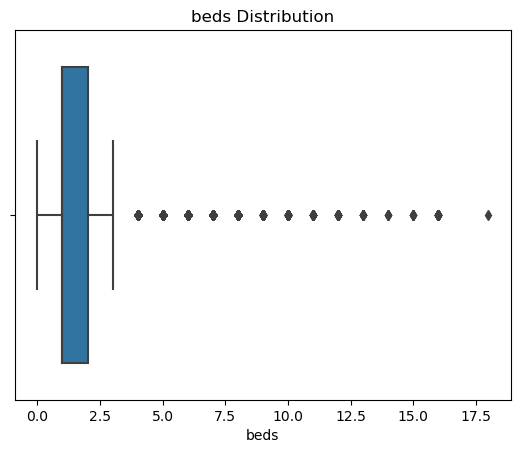

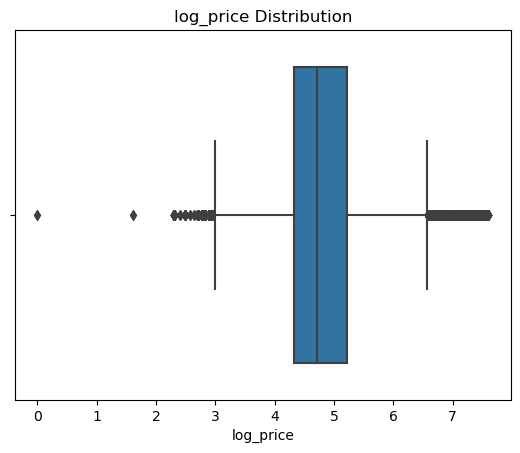

In [21]:
for i in num:
    ax = sns.boxplot(data = df,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{}'.format(i))
    plt.show()

In [22]:
df.value_counts
for i in cat:
    print(i)
    #df[i].value_counts()
    print( df[i].value_counts())
    print()

room_type
room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

cancellation_policy
cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

cleaning_fee
cleaning_fee
True     54399
False    19708
Name: count, dtype: int64

instant_bookable
instant_bookable
f    54660
t    19451
Name: count, dtype: int64



In [23]:
df.value_counts
for i in cat:
    print( df[i].value_counts(normalize=True)) #normalize=True - Gives in percentage
    print()

room_type
Entire home/apt    0.557418
Private room       0.413394
Shared room        0.029188
Name: proportion, dtype: float64

cancellation_policy
strict      0.438579
flexible    0.304212
moderate    0.257210
Name: proportion, dtype: float64

cleaning_fee
True     0.73406
False    0.26594
Name: proportion, dtype: float64

instant_bookable
f    0.737542
t    0.262458
Name: proportion, dtype: float64



Note: In this we can't treat outlier as bedroom are shared  


### Bivarient analysis

/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


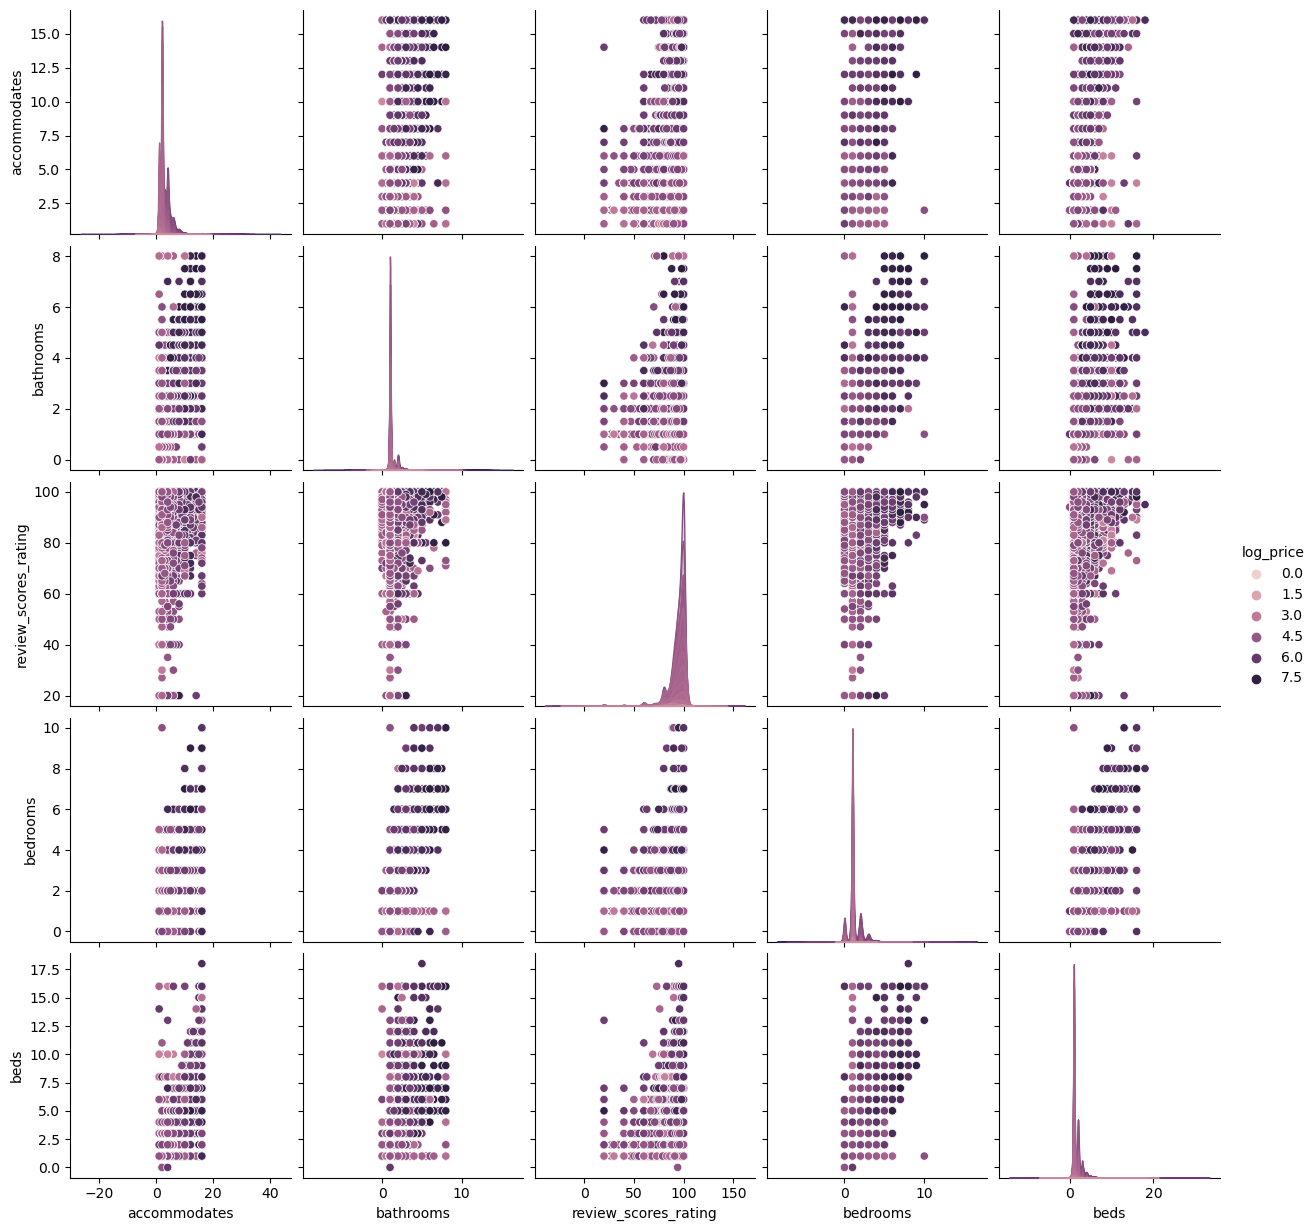

In [24]:
sns.pairplot(df[num],hue='log_price')

In [25]:
# No direct coorilation of above plot, some wired relationship


<Axes: >

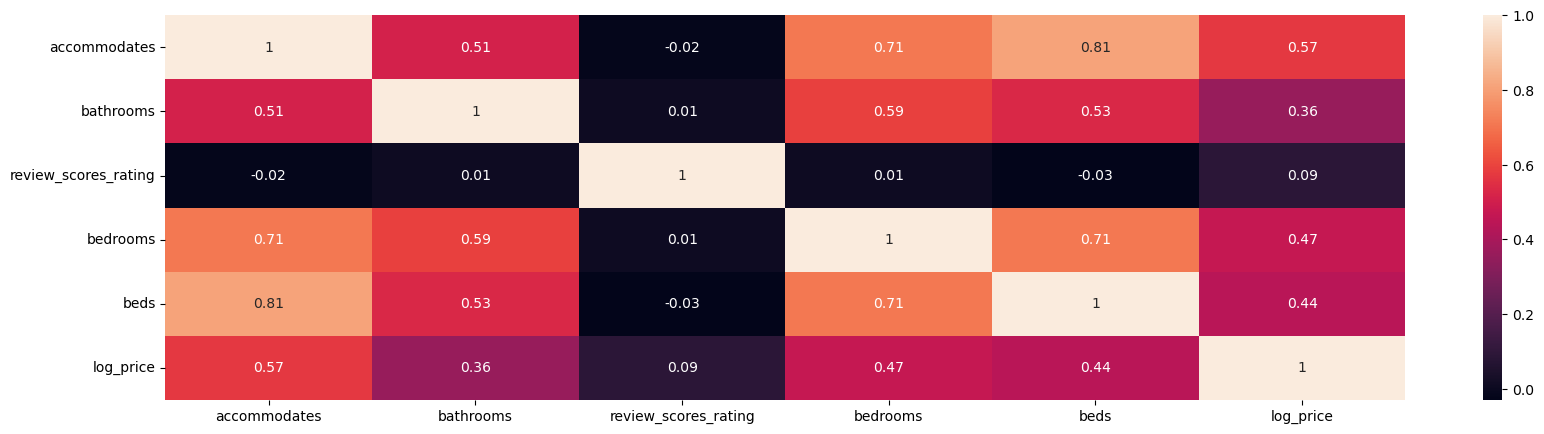

In [26]:
plt.figure(figsize=(20,5))
sns.heatmap(round(df[num].corr(),2),annot=True)

<Axes: >

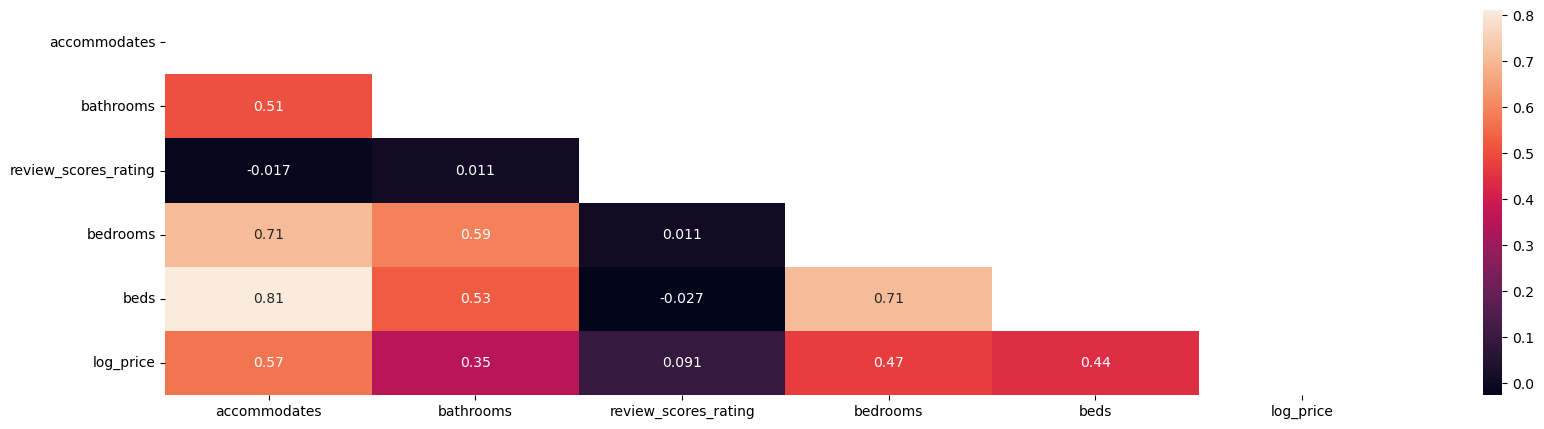

In [27]:
plt.figure(figsize=(20,5))
mask = np.triu(np.ones_like(df[num].corr(), dtype=bool))
sns.heatmap(round(df[num].corr(),3),annot=True,mask=mask)

In [28]:
df[num].corr()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
accommodates,1.000000,0.505645,-0.017093,0.709275,0.810798,0.567580
bathrooms,0.505645,1.000000,0.010527,0.589935,0.525598,0.355425
review_scores_rating,-0.017093,0.010527,1.000000,0.011134,-0.027330,0.091219
bedrooms,0.709275,0.589935,0.011134,1.000000,0.709415,0.473214
beds,0.810798,0.525598,-0.027330,0.709415,1.000000,0.442153
log_price,0.567580,0.355425,0.091219,0.473214,0.442153,1.000000


In [90]:
## Do this to improve HW as homework

df_copy = df.copy()
df_copy.drop('beds',axis=1,inplace = True)

plt.figure(figsize=(20,5))
mask = np.triu(np.ones_like(df_copy.corr(), dtype=bool))
sns.heatmap(round(df_copy.corr(),3),annot=True,mask=mask)

# Coorilation concept:

Interpretation of Correlation coefficients

Perfect: 0.80 to 1.00
Strong: 0.50 to 0.79
Moderate: 0.30 to 0.49
Weak: 0.00 to 0.29

Value greater than 0.7 is considered a strong correlation between variables.

Advantages of Correlation Analysis

Correlation analysis helps us understand how two variables affect each other or are related to each other.
They are simple and very easy to interpret.
Aids in decision-making process in business, healthcare, marketing, etc
Helps in feature selection in machine learning.
Gives a measure of the relation between two variables.

Disadvantages of Correlation Analysis

Correlation does not imply causation, which means a variable may not be the cause for the other variable even though they are correlated.
If outliers are not dealt with well they may cause errors.
It works well only on bivariate relations and may not produce accurate results for multivariate relations.
Complex relations can not be analyzed accurately.



In [29]:
#There is coorilation with log_price with Accomodation,bathrooms,bedrooms,beds
# drop accommodates or bedrooms -> we dropped bedrooms as it less coorilated

In [30]:
### Convert Catorigical into numerical

In [31]:
df['cleaning_fee'] = df['cleaning_fee'].astype(str)
df['cleaning_fee'].replace(to_replace=['False','True'],value=[0,1], inplace=True)
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1,t,NaN,0.0,2.0,5.273000


In [32]:
df['instant_bookable'] = df['instant_bookable'].astype(str)
df['instant_bookable'].replace(to_replace=['f','t'],value=[0,1], inplace=True)
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1,0,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1,1,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1,1,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1,0,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1,1,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0,0,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1,0,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1,1,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1,1,NaN,0.0,2.0,5.273000


In [33]:
df['cancellation_policy'] = df['cancellation_policy'].astype(str)
df['cancellation_policy'].replace(to_replace=['strict','moderate','flexible'],value=[0,1,2], inplace=True)
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,0,1,0,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,0,1,1,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,1,1,1,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,2,1,0,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,1,1,1,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,2,0,0,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,1,1,0,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,1,1,1,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,0,1,1,NaN,0.0,2.0,5.273000


In [34]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [35]:
df['room_type'] = df['room_type'].astype(str)
df['room_type'].replace(to_replace=['Entire home/apt','Private room','Shared room'],value=[0,1,2], inplace=True)
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,0,3.0,1.0,0,1,0,100.0,1.0,1.0,5.010635
1,0,7.0,1.0,0,1,1,93.0,3.0,3.0,5.129899
2,0,5.0,1.0,1,1,1,92.0,1.0,3.0,4.976734
3,0,4.0,1.0,2,1,0,NaN,2.0,2.0,6.620073
4,0,2.0,1.0,1,1,1,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,1,1.0,1.0,2,0,0,NaN,1.0,1.0,4.605170
74107,0,4.0,2.0,1,1,0,93.0,2.0,4.0,5.043425
74108,0,5.0,1.0,1,1,1,94.0,2.0,2.0,5.220356
74109,0,2.0,1.0,0,1,1,NaN,0.0,2.0,5.273000


### Null value treatment
    Two ways 
    1) Measure of central tendency - Mean(Distibutin is not skewed), medium(Distibutin is skewed), mode-Only for catorigical, -> 
    2) Predictive mobling -> Why to replace with Mean,medium,mode, find the nearest neighbour and decide according to it-> its better then Measure of central tendency [KNN Imputer]
    
    


In [36]:
df.isnull().sum()

room_type                   0
accommodates                3
bathrooms                 203
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

##### Knn imputer

In [44]:
from sklearn.impute import KNNImputer


In [45]:
imputer = KNNImputer(n_neighbors=5)
imputed_df = imputer.fit_transform(df)

In [46]:
imputed_df # It converted every column as array

array([[0.        , 3.        , 1.        , ..., 1.        , 1.        ,
        5.01063529],
       [0.        , 7.        , 1.        , ..., 3.        , 3.        ,
        5.12989872],
       [0.        , 5.        , 1.        , ..., 1.        , 3.        ,
        4.97673374],
       ...,
       [0.        , 5.        , 1.        , ..., 2.        , 2.        ,
        5.22035583],
       [0.        , 2.        , 1.        , ..., 0.        , 2.        ,
        5.27299956],
       [0.        , 4.        , 1.        , ..., 1.        , 2.        ,
        4.85203026]])

In [49]:
#Data = pd.DataFrame(data=df, columns=['room_type', 'accommodates', 'bathrooms', 'cancellation_policy', 'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms', 'beds', 'log_price'])

In [58]:
df = pd.DataFrame(imputed_df,columns=df.columns)
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,0.0,3.0,1.0,0.0,1.0,0.0,100.0,1.0,1.0,5.010635
1,0.0,7.0,1.0,0.0,1.0,1.0,93.0,3.0,3.0,5.129899
2,0.0,5.0,1.0,1.0,1.0,1.0,92.0,1.0,3.0,4.976734
3,0.0,4.0,1.0,2.0,1.0,0.0,93.2,2.0,2.0,6.620073
4,0.0,2.0,1.0,1.0,1.0,1.0,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,1.0,1.0,1.0,2.0,0.0,0.0,96.0,1.0,1.0,4.605170
74107,0.0,4.0,2.0,1.0,1.0,0.0,93.0,2.0,4.0,5.043425
74108,0.0,5.0,1.0,1.0,1.0,1.0,94.0,2.0,2.0,5.220356
74109,0.0,2.0,1.0,0.0,1.0,1.0,96.6,0.0,2.0,5.273000


In [73]:
df.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

## Model Building

In [60]:
x = df.drop('log_price',axis=1)
print(f'x={x}')
y = df['log_price']
print(f'y={y}')


x=       room_type  accommodates  bathrooms  cancellation_policy  cleaning_fee  \
0            0.0           3.0        1.0                  0.0           1.0   
1            0.0           7.0        1.0                  0.0           1.0   
2            0.0           5.0        1.0                  1.0           1.0   
3            0.0           4.0        1.0                  2.0           1.0   
4            0.0           2.0        1.0                  1.0           1.0   
...          ...           ...        ...                  ...           ...   
74106        1.0           1.0        1.0                  2.0           0.0   
74107        0.0           4.0        2.0                  1.0           1.0   
74108        0.0           5.0        1.0                  1.0           1.0   
74109        0.0           2.0        1.0                  0.0           1.0   
74110        0.0           4.0        1.0                  1.0           0.0   

       instant_bookable  review_score

In [61]:
#Spit
# Industry standard for splitting is 70:30

from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

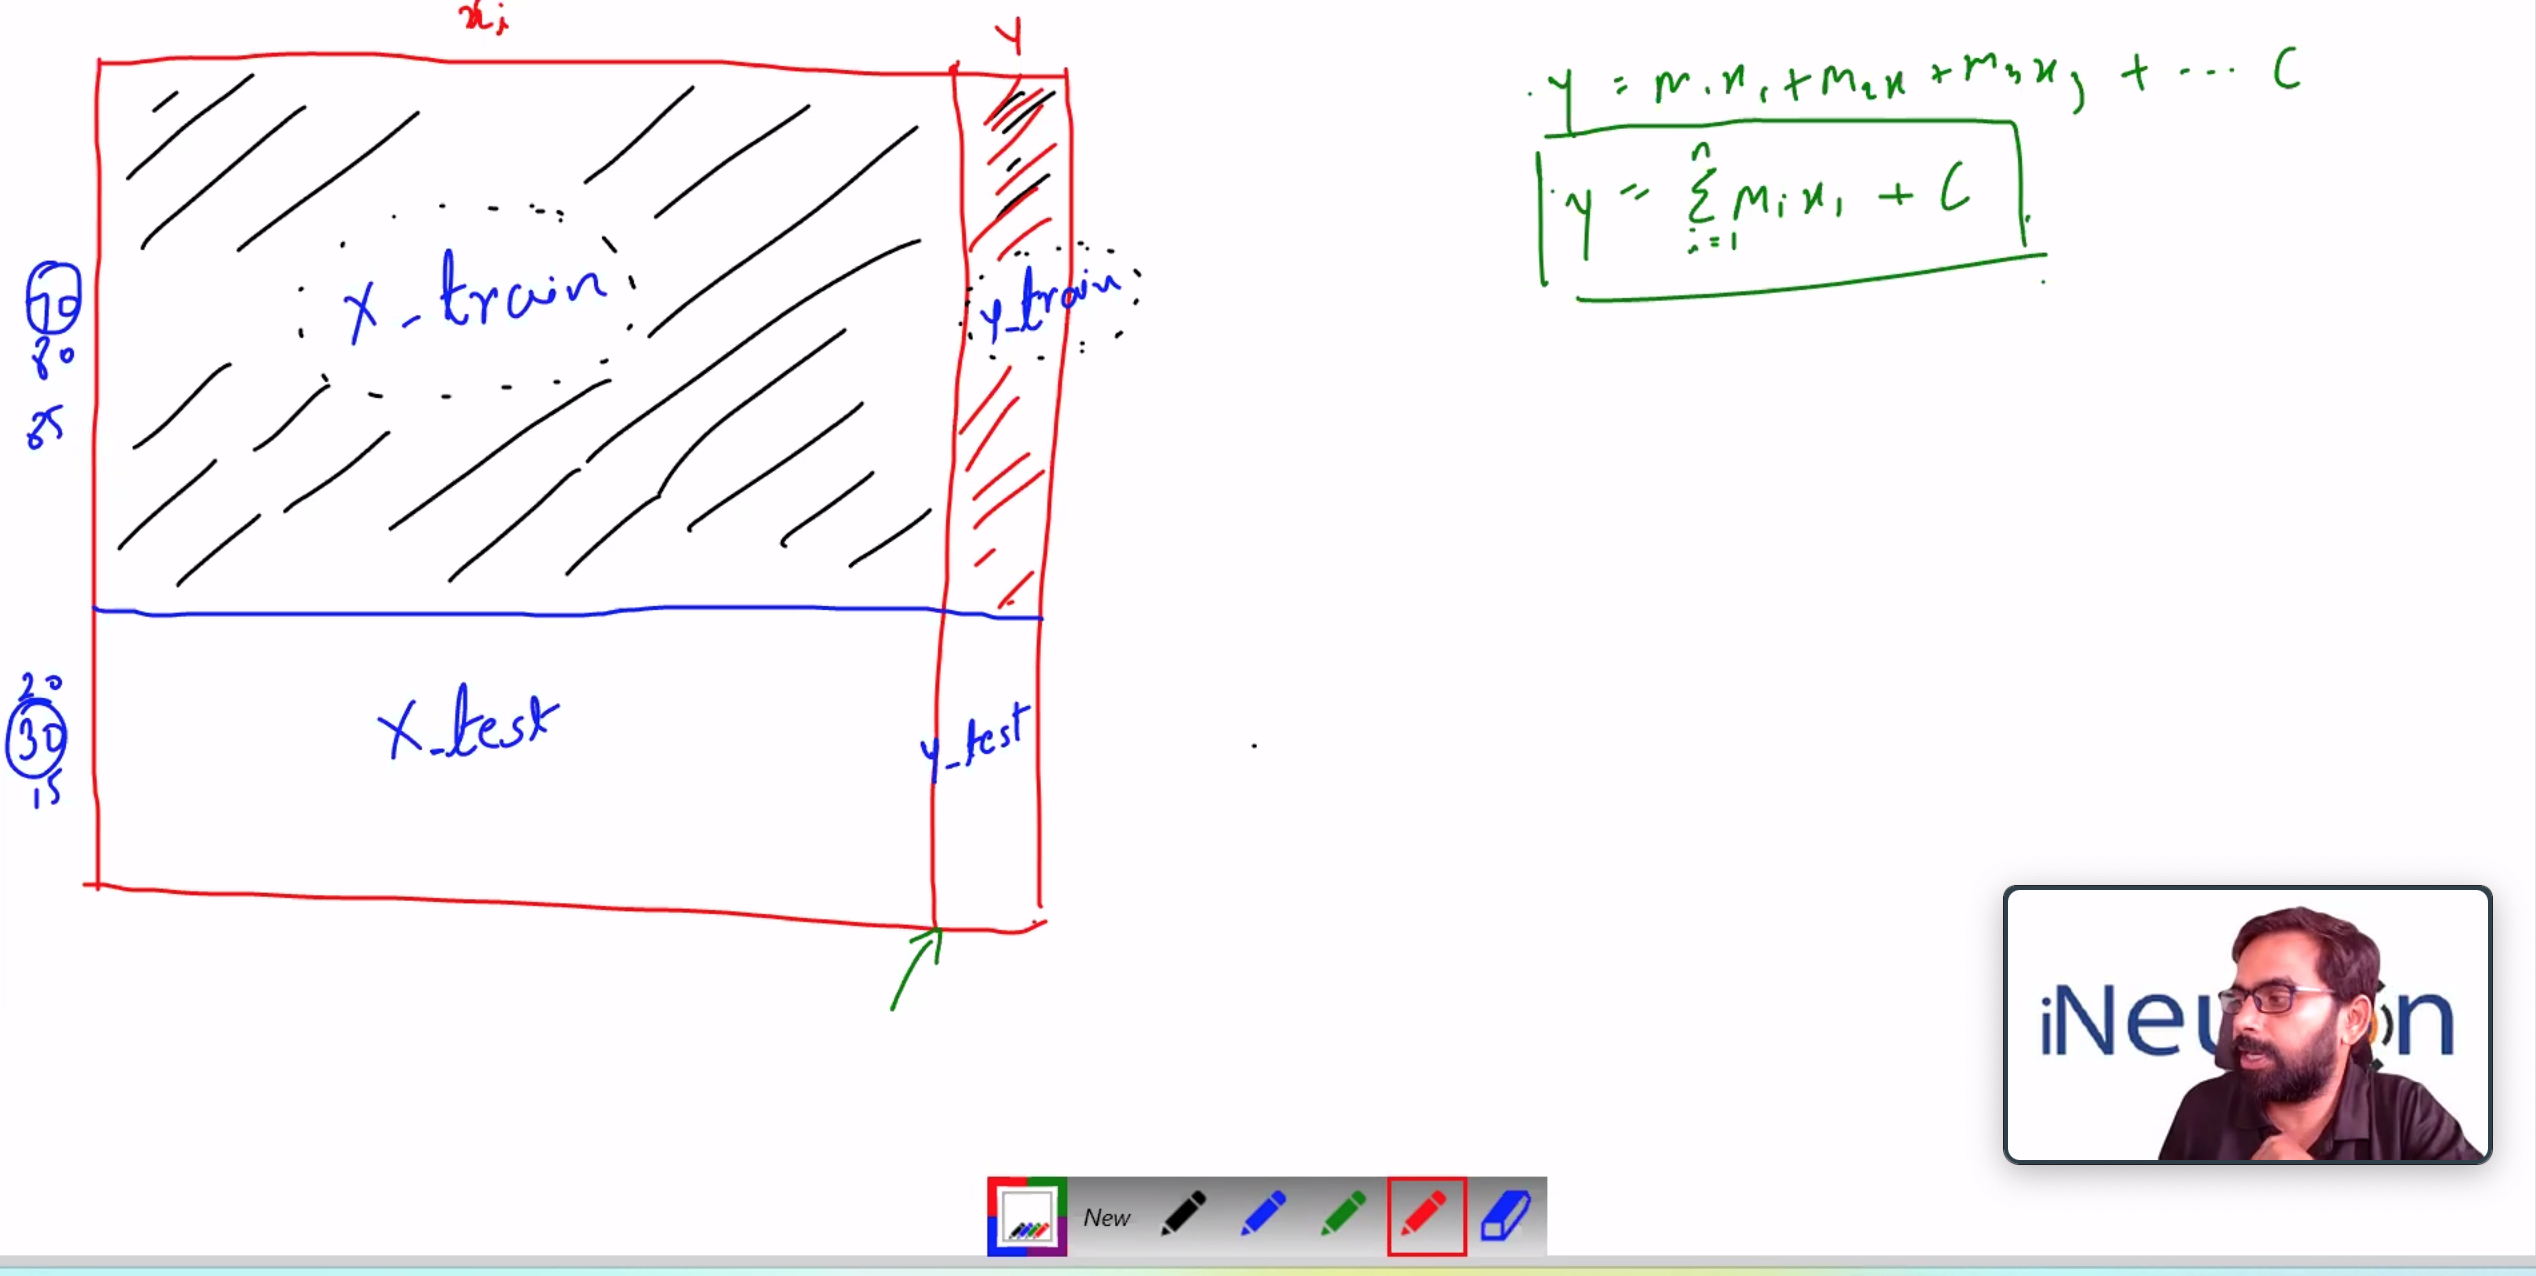

In [82]:
lir_model = LinearRegression()

In [83]:
lir_model

LinearRegression()

In [85]:
lir_model.fit(x_train,y_train)

LinearRegression()

In [86]:
lir_model.coef_ 

array([-6.11505759e-01,  8.04445390e-02,  1.51113944e-01,  5.92298271e-05,
       -7.98827406e-02, -5.15023909e-02,  7.04138720e-03,  1.47044239e-01,
       -4.60988033e-02])

In [87]:
lir_model.intercept_ 

3.9309304802842218

In [ ]:
#Log price = -6.115*room_type +  8.0444*accommodates + 1.5*bathrooms .......... + Intercept
#Log price = -6.115*room_type +  8.0444*accommodates + 1.5*bathrooms .......... + 3.9309304802842218

### Model Evaluation

In [88]:
lir_model.score(x_train,y_train)

0.5177862684079642

In [89]:
lir_model.score(x_test,y_test)

0.5153955845968243

In [97]:
# Score is less What we can do,(Drop some column and try and error to maximize score) 
## HomeWork ##Without changing model Improve score

In [96]:
y_train_pred = lir_model.predict(x_train)
y_train_pred

array([4.5071813 , 4.32852284, 4.96825338, ..., 5.59362818, 5.45655575,
       5.29245901])

## Model Regularisation 

### Ridge

In [100]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [101]:
from sklearn.metrics import r2_score

In [103]:
print('Regrattion model TRAIN score is {}'.format(lir_model.score(x_train,y_train)))
print('Regrattion model TEST score is {}'.format(lir_model.score(x_test,y_test)))

Regrattion model TRAIN score is 0.5177862684079642
Regrattion model TEST score is 0.5153955845968243


In [109]:
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(x_train,y_train)


Ridge(alpha=0.3)

In [110]:
print('Ridge model TRAIN score is {}'.format(ridge_model.score(x_train,y_train)))
print('Ridge model TEST score is {}'.format(ridge_model.score(x_test,y_test)))

Ridge model TRAIN score is 0.5177862682829869
Ridge model TEST score is 0.5153957246333605


In [111]:
ridge_model2 = Ridge(alpha=0.9)
ridge_model2.fit(x_train,y_train)


Ridge(alpha=0.9)

In [112]:
print('Ridge model TRAIN score is {}'.format(ridge_model2.score(x_train,y_train)))
print('Ridge model TEST score is {}'.format(ridge_model2.score(x_test,y_test)))

Ridge model TRAIN score is 0.5177862672832974
Ridge model TEST score is 0.5153960039201466


### Lasso

In [116]:
l1 = Lasso(alpha = 0.1)
l1.fit(x_train,y_train)
print('Lasso model TRAIN score is {}'.format(l1.score(x_train,y_train)))
print('Lasso model TEST score is {}'.format(l1.score(x_test,y_test)))

Lasso model TRAIN score is 0.4151656465658723
Lasso model TEST score is 0.4164152553900835


In [117]:
l2 = Lasso(alpha = 0.00001)
l2.fit(x_train,y_train)
print('Lasso model TRAIN score is {}'.format(l2.score(x_train,y_train)))
print('Lasso model TEST score is {}'.format(l2.score(x_test,y_test)))

Lasso model TRAIN score is 0.5177862633126984
Lasso model TEST score is 0.515394969925686


#### Note:
#75-80 score is considered as good
#The model in not successful because


    1) Data is not sufficient -> Ask Data engineer for more Data , check what else impact pricess, Give Localtion(There we can try clustering)
    
    
    2) We have not build model proerly ->

## Non-Linear Models

In [119]:
from sklearn.preprocessing import PolynomialFeatures

In [121]:
poly = PolynomialFeatures(degree=2,interaction_only=True)

In [122]:
x_poly = poly.fit_transform(x)

In [123]:
xp_train,xp_test,yp_train,yp_test = train_test_split(x_poly,y,test_size=0.3,random_state=1)

In [124]:
xp_train.shape

(51877, 46)

In [125]:
lir_model = LinearRegression()
lir_model.fit(xp_train,yp_train)

LinearRegression()

In [126]:
lir_model.coef_ 

array([ 3.89786726e-16, -3.57499577e-01,  6.73103591e-03,  1.69491009e-02,
        4.71309651e-02,  1.40249466e-01, -4.85256284e-02,  3.68974477e-03,
        2.07270309e-01,  1.33944423e-01,  2.14371465e-02, -2.39998034e-01,
        5.07712724e-02,  3.50931502e-02,  5.15857398e-04,  5.22176830e-04,
       -9.26057177e-02, -1.74929791e-02, -8.31237268e-03,  1.09389144e-02,
       -2.78428904e-02,  9.98932954e-03,  1.12222696e-03, -1.69672331e-03,
       -8.03615237e-03,  1.21838651e-02,  1.13437333e-03,  5.95320628e-03,
        3.02144714e-03, -3.66977446e-03,  6.52177849e-03, -5.72367113e-02,
       -1.91459277e-03, -5.54575917e-04, -1.43106321e-02, -5.62081047e-03,
       -2.22989267e-02, -1.10685401e-03,  7.11706735e-03, -6.25847200e-04,
        1.54695264e-04, -9.83342084e-03, -1.43093617e-02, -8.99488980e-04,
       -1.19458257e-03,  3.92009786e-03])

In [127]:
print('Regression model TRAIN score is {}'.format(lir_model.score(xp_train,yp_train)))
print('Regression model TEST score is {}'.format(lir_model.score(xp_test,yp_test)))

Regrattion model TRAIN score is 0.5361917788670243
Regrattion model TEST score is 0.5324232807354174


In [133]:
R = Ridge(alpha=0.03)
R.fit(xp_train,yp_train)
print('Ridge model TRAIN score is {}'.format(R.score(xp_train,yp_train)))
print('Ridge model TEST score is {}'.format(R.score(xp_test,yp_test)))

Ridge model TRAIN score is 0.5361917787760339
Ridge model TEST score is 0.5324231373842758


In [130]:
L = Lasso(alpha = 0.003)
L.fit(xp_train,yp_train)
print('Ridge model TRAIN score is {}'.format(L.score(xp_train,yp_train)))
print('Ridge model TEST score is {}'.format(L.score(xp_test,yp_test)))

Ridge model TRAIN score is 0.5332564961026275
Ridge model TEST score is 0.5289177844730576


In [131]:
## In Linear regression there is no scope of hperparameter tuning , its helpful in Classification

### Summary 

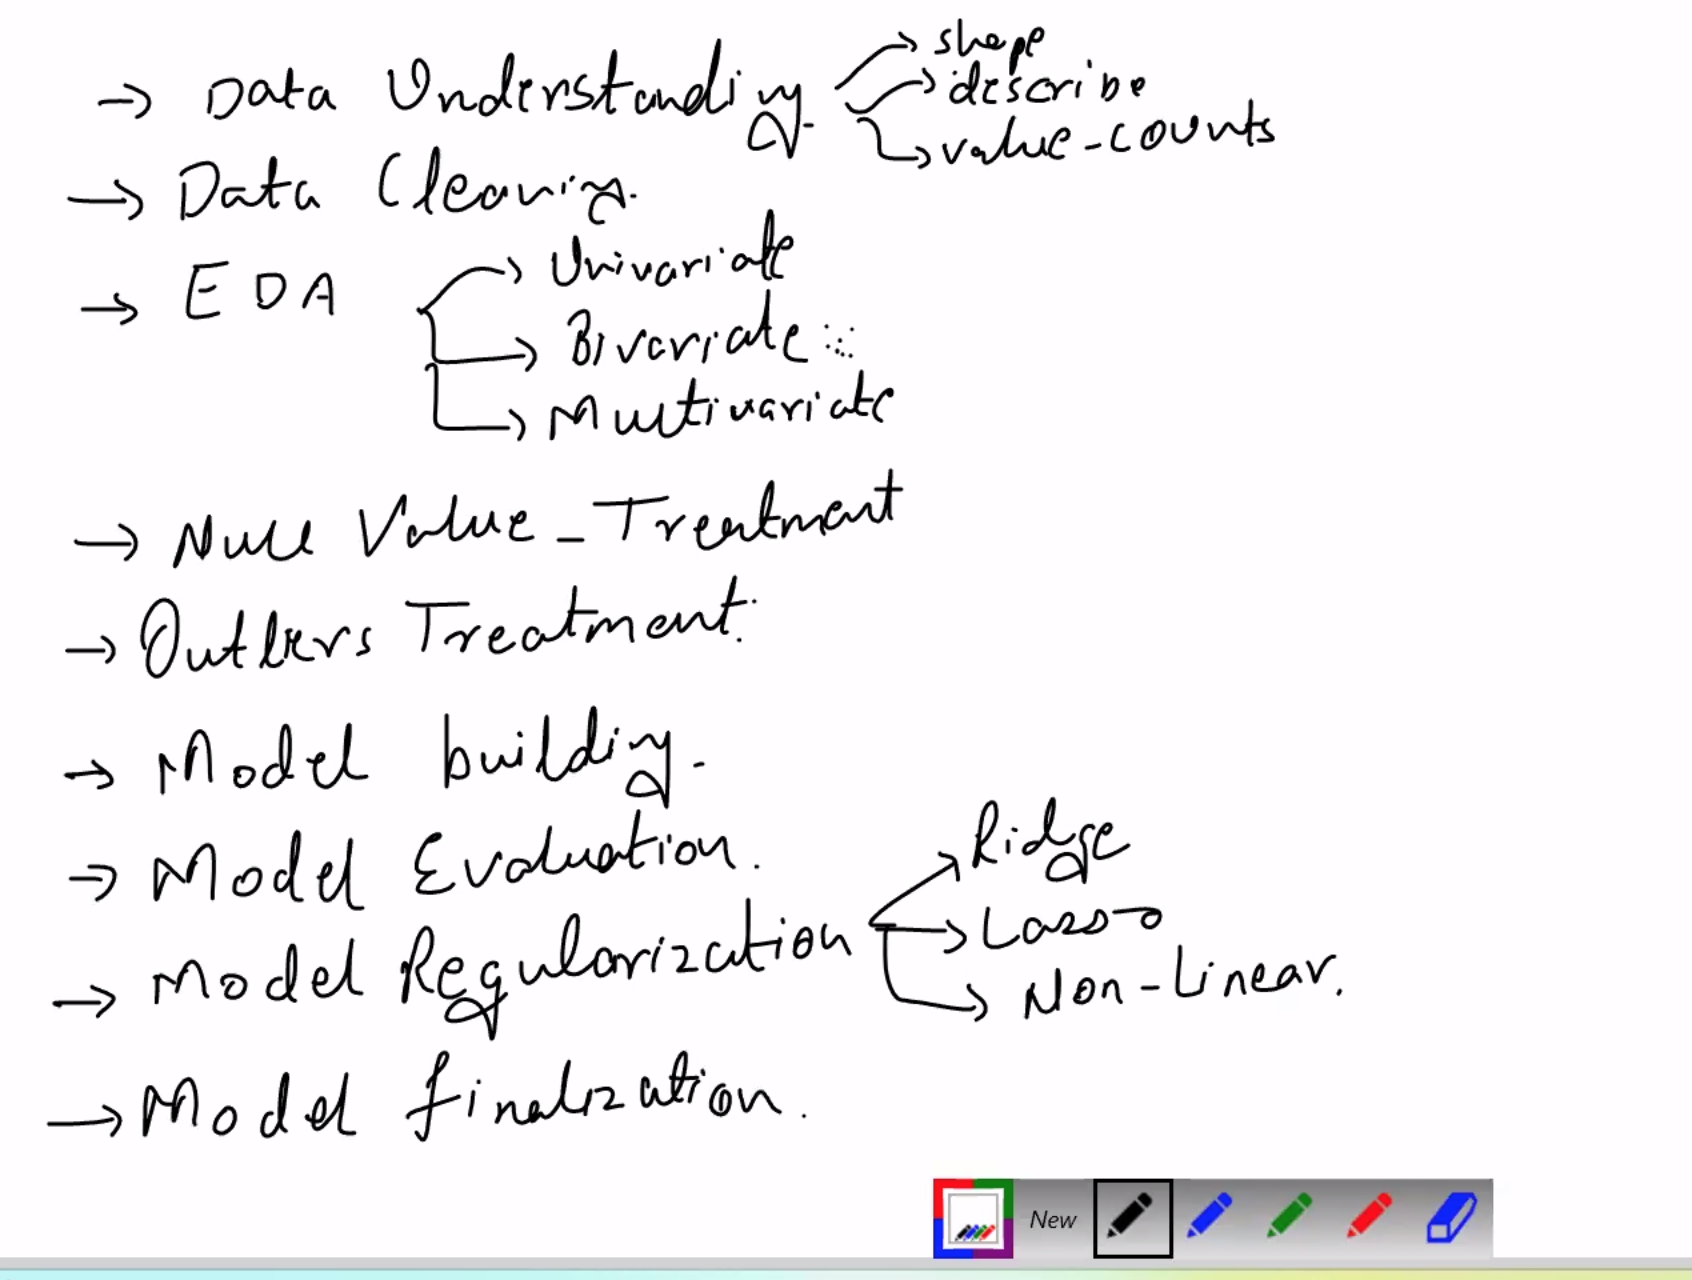

In this case we cannot finalise the model